### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 10
popsize = 20
generations = 200
name = 'centered5'
#device = torch.device('mps:0')
device = torch.device('cpu')
#trainer = Evo_Trainer(n, device)
trainer = Evo_Trainer(n, device, popsize)

2023-02-16 08:20:17,687	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-16 08:20:20] INFO     <84022> evotorch.core: Instance of `Custom_NEProblem` (id:4401594912) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-16 08:20:20] INFO     <84022> evotorch.core: Instance of `Custom_NEProblem` (id:4401594912) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-16 08:20:20] INFO     <84022> evotorch.core: Instance of `Custom_NEProblem` (id:4401594912) -- The `device` of the problem is set as cpu
[2023-02-16 08:20:20] INFO     <84022> evotorch.core: Instance of `Custom_NEProblem` (id:4401594912) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-16 08:20:20] INFO     <84022> evotorch.core: Instance of `Custom_NEProblem` (id:4401594912) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

(EvaluationActor pid=84065) fitness function returned nan
(EvaluationActor pid=84069) fitness function returned nan
         iter : 1
     stepsize : ReadOnlyTensor(9.9151)
  median_eval : 1.0529470443725586
    mean_eval : 1.1636922359466553
pop_best_eval : 3.6023976802825928

         iter : 2
     stepsize : ReadOnlyTensor(9.8366)
  median_eval : 1.10089910030365
    mean_eval : 3.9897987842559814
pop_best_eval : 52.71432113647461

(EvaluationActor pid=84066) fitness function returned nan
(EvaluationActor pid=84065) fitness function returned nan
         iter : 3
     stepsize : ReadOnlyTensor(9.7625)
  median_eval : 0.1878121942281723
    mean_eval : 0.6691777110099792
pop_best_eval : 3.4485514163970947

(EvaluationActor pid=84065) fitness function returned nan
(EvaluationActor pid=84068) fitness function returned nan
         iter : 4
     stepsize : ReadOnlyTensor(9.6925)
  median_eval : 1.1168831586837769
    mean_eval : 1.5758205652236938
pop_best_eval : 6.318446636199951

    

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])

#### Visualize trained network

In [6]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer()
network(graph, 0)

(Data(x=[40, 7], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

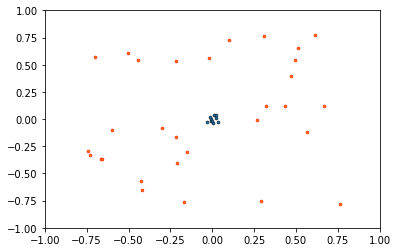

In [7]:
anim = visualizer.animate_organism(graph, network, food=30, frames=300)
visualizer.save_animation_to_gif(anim, name, 10)

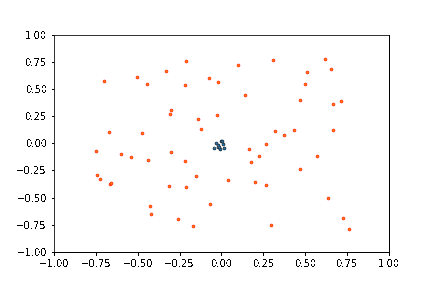

In [8]:
Image('../animation/' + name + '.gif')

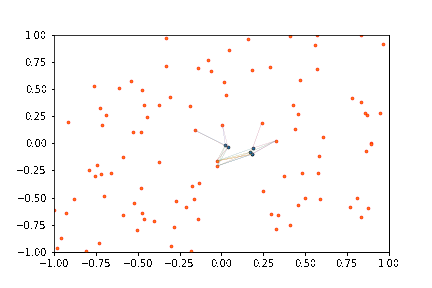

In [9]:
Image('../animation/GATConv1.gif')

In [10]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [11]:
print(network)

CGConv1(
  (conv_layer_cells): CGConv(7, dim=4)
  (conv_layer_food): CGConv(7, dim=4)
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=14, out_features=7, bias=True)
    (2): ReLU()
    (3): Linear(in_features=7, out_features=4, bias=True)
    (4): ReLU()
  )
  (mlp_before): Sequential(
    (0): Linear(in_features=7, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): ReLU()
  )
)


In [12]:
print(network.conv_layers)
for param in network.conv_layers.parameters():
  print(param.data)

AttributeError: 'CGConv1' object has no attribute 'conv_layers'

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>